<a href="https://colab.research.google.com/github/y-nagayoshi/machine-learning-at-work/blob/main/3%E7%AB%A0_%E5%AD%A6%E7%BF%92%E7%B5%90%E6%9E%9C%E3%82%92%E8%A9%95%E4%BE%A1%E3%81%99%E3%82%8B%E3%81%AB%E3%81%AF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# jupyter notebook latex
# https://nbviewer.org/github/ipython/ipython/blob/2.x/examples/Notebook/Display%20System.ipynb#LaTeX

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn import svm

data, label = make_classification(
    n_samples=100,
    random_state=12,
    n_features=2,
    n_redundant=0,
    n_informative=1,
    n_clusters_per_class=1,
    n_classes=2
  )

data_train, data_test, label_train, label_test = train_test_split(data, label)

classifier = svm.SVC(kernel='linear')
label_pred = classifier.fit(data_train, label_train).predict(data_test)

cm = confusion_matrix(label_test, label_pred)
cm

array([[13,  0],
       [ 0, 12]])

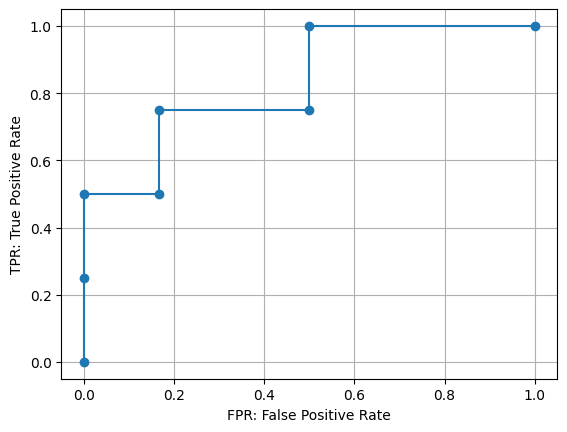

In [6]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pass = [0, 0, 0, 1, 0, 0, 1, 0, 1, 1]
y_score = [0.1, 0.2, 0.4, 0.45, 0.5, 0.65, 0.7, 0.8, 0.85, 0.95]

fpr, tpr, thresholds = roc_curve(y_pass, y_score)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False Positive Rate')
plt.ylabel('TPR: True Positive Rate')
plt.grid()
plt.show()

In [8]:
from sklearn.metrics import auc, roc_auc_score
print(f"AUC func {auc(fpr, tpr)}")
print(f"AUC roc_auc_score {roc_auc_score(y_pass, y_score)}")

AUC func 0.8333333333333333
AUC roc_auc_score 0.8333333333333333


## 3.2　回帰の評価
### 3.2.1　平均二乗誤差

\begin{eqnarray}
RMSE & = \sqrt{\frac{\Sigma_i(予測値_i - 実測値_i)^2}{N}} \\
\end{eqnarray}

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.datasets import make_regression
import numpy as np

array_size = 100
y_actual = np.random.randint(0, 100, size=array_size)
y_predict = np.random.randint(0, 100, size=array_size)

rms = mean_squared_error(y_actual, y_predict)
rms

1830.79

### 3.2.2　決定係数

\begin{eqnarray}
決定係数(R^2) & = 1 - \frac{\Sigma_i(実測値_i - 予測値_i)^2}{\Sigma_i(実測値_i - 実測値の平均_i)^2} \\
\end{eqnarray}

In [17]:
from sklearn.linear_model import LinearRegression

x, y, coef = make_regression(
    random_state=12,
    n_samples=100,
    n_features=4,
    n_informative=2,
    noise=10.0,
    bias=-0.0,
    coef=True
  )

lr = LinearRegression()

lr.fit(x, y)

from sklearn.metrics import r2_score
r2 = r2_score(y, lr.predict(x))
r2

0.9915476615445875

In [ ]:
## 88